In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [7]:
df1.groupby("area_type").count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [10]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data cleaning proccess

In [18]:
# How many null values we have
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
# remove all the rows that have null values
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature engineering

In [21]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df3["bhk"] = df3["size"].apply(lambda x : int(x.split(" ")[0]))

C:\Users\styl_\AppData\Local\Temp\ipykernel_2204\1822834614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x : int(x.split(" ")[0]))


In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [26]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [27]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
# need to convert the range values into a single value

In [29]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
df3[~df3.total_sqft.apply(is_float)]
#~ give us the opposite

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [34]:
# if there is range we put the average

In [35]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [36]:
convert_sqft_to_num('211')

211.0

In [40]:
convert_sqft_to_num('2 - 4')

3.0

In [42]:
convert_sqft_to_num('2  4we')

In [43]:
df4 = df3.copy()

In [44]:
df4['total_sqft'] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [45]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [46]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [47]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [48]:
len(df5.location.unique())

1304

In [93]:
################## testing

In [86]:
df6 = df5.copy()

In [87]:
D = df5.location.unique()
D

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [88]:
"Kothanur" in D

True

In [89]:
np.argwhere(D == "Abshot Layout").flatten()[0]

1303

In [90]:
def convert_to_number(x):
    if x in D:
        return np.argwhere(D == x).flatten()[0]

In [91]:
df6['location'] = df6.location.apply(convert_to_number)

In [92]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,5,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,864,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,15,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,128,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [94]:
################## end testing

In [96]:
df5.location = df5.location.apply(lambda x : x.strip())

In [103]:
location_stats = df5.groupby("location").location.count().sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [104]:
# every location with less than 10 items in location will be called other

In [109]:
location_stats[location_stats <= 10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [110]:
len(location_stats[location_stats <= 10])

1052

In [111]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [113]:
len(df5.location.unique())

1293

In [115]:
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)

In [116]:
len(df5.location.unique())

242

# Outliers

In [117]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [118]:
df5.shape

(13246, 7)

In [145]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]

In [146]:
df6.shape

(12502, 7)

In [147]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [148]:
mean = df6.price_per_sqft.mean()
std = df6.price_per_sqft.std()
threshold = 1
def remove_outliers(x):
    if abs((x - mean)/std) > threshold:
        return None
    else:
        return x
    

In [149]:
df6["price_per_sqft"] = df6.price_per_sqft.apply(remove_outliers)

C:\Users\styl_\AppData\Local\Temp\ipykernel_2204\384319959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["price_per_sqft"] = df6.price_per_sqft.apply(remove_outliers)


In [150]:
df6.price_per_sqft

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316             NaN
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 12502, dtype: float64

In [151]:
df6.price_per_sqft.describe()

count    11294.000000
mean      5371.339321
std       1667.328621
min       2149.277061
25%       4123.711340
50%       5091.925499
75%       6363.636364
max      10476.190476
Name: price_per_sqft, dtype: float64

In [152]:
df6.price_per_sqft.isna().sum()

1208

In [153]:
df7 = df6.dropna()

In [154]:
df7.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [155]:
df8 =df7.copy()

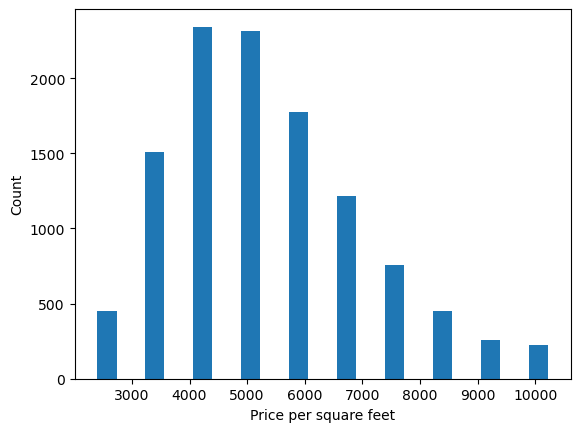

In [163]:
plt.hist(df8.price_per_sqft, rwidth = 0.4)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.show()

In [164]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [165]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


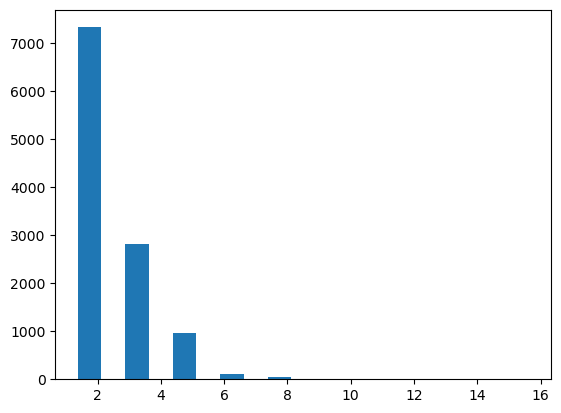

In [167]:
plt.hist(df8.bath, rwidth =0.5)
plt.show()

In [168]:
# some criteria we might have
df8[df8.bath > df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [171]:
df9 = df8[df8.bath < df8.bhk +2]

In [172]:
df9.shape

(11198, 7)

In [173]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


# Model build

In [181]:
# one hot encoding
dummies = pd.get_dummies(df10.location, dtype = int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
df11 = pd.concat([df10, dummies.drop("other", axis = 'columns')], axis = 'columns')

In [184]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
del df11['location']

In [188]:
df12 = df11.copy()
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df12.shape

(11198, 244)

In [190]:
X = df12.drop('price', axis = 'columns')
X.head()
# X is the independent variables - inputs

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
y = df12.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=10)

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.849779106963401

Now we do a cross validation to see if our model is actually this good

In [218]:
cross = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)
    lr_clf = LinearRegression()
    lr_clf.fit(X_train,y_train)
    if lr_clf.score(X_test, y_test) > 0 :
        cross.append(lr_clf.score(X_test, y_test))

In [219]:
cross

[0.8752878707243478,
 0.9005485649109298,
 0.8454429271707156,
 0.8702150968427711,
 0.7866501836605632,
 0.8504539773293834,
 0.826000924701956,
 0.8667688726020112]

In [220]:
np.mean(cross)

0.8526710522428347

As we can see we have a very good accuracy for our model

In [223]:
locations = np.array(X.columns)
locations

array(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'B

In [224]:
def prediction(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))
    index = np.where(locations == location)[0][0]
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if index >= 0:
        x[index] = 1
    return lr_clf.predict([x])[0]

In [226]:
prediction('1st Phase JP Nagar',1000, 2, 2)

C:\Users\styl_\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.92037029733713